In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df=pd.read_csv('online_shoppers_intention.csv')
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

 Plotting the Percentage of customers have brought Revenue. ‘True’ means customer has bought the product and ‘False’ means customer didnot buy the product.

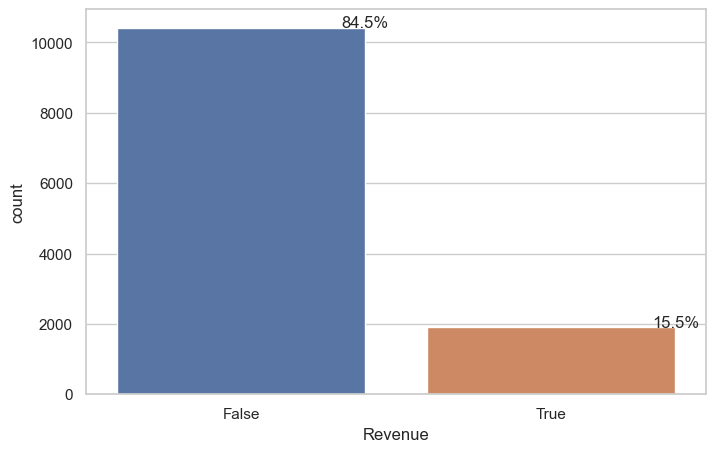

In [11]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="Revenue", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

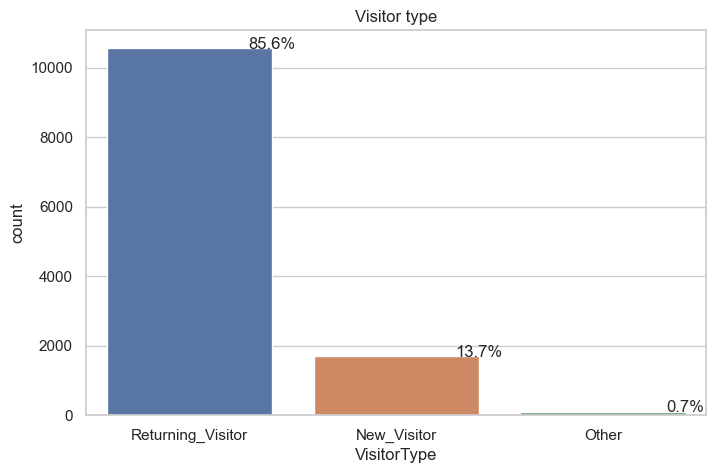

In [12]:
df['VisitorType'].value_counts()
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
plt.title("Visitor type")
total = float(len(df))
ax = sns.countplot(x="VisitorType", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

/Users/macintosh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Percentage distribution of VisitorType over the Weekend')

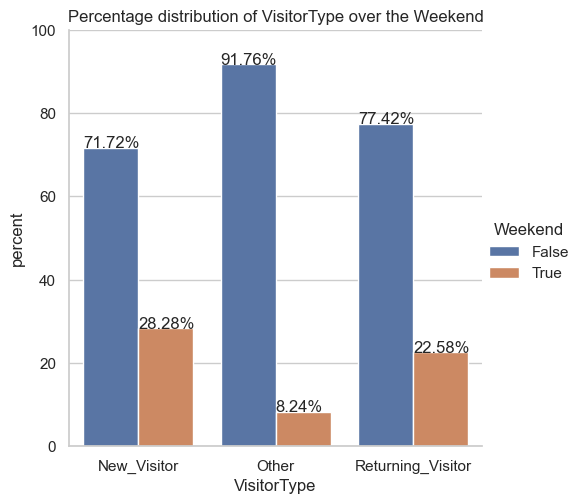

In [16]:
x,y = 'VisitorType', 'Weekend'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.title("Percentage distribution of VisitorType over the Weekend")

/Users/macintosh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Revenue (Buy or Not) for different Traffic Types')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


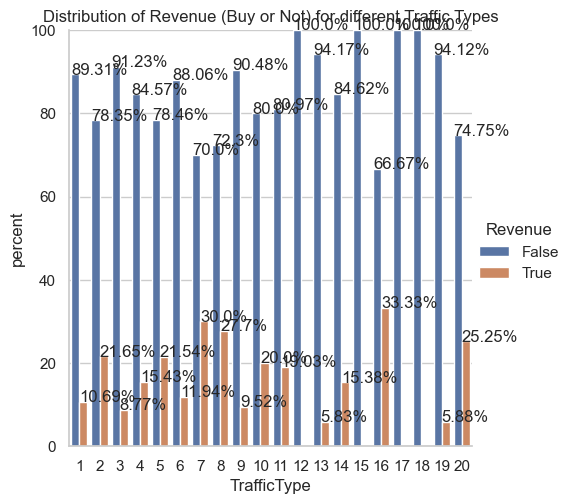

In [17]:
x='TrafficType'
y= 'Revenue'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.title("Distribution of Revenue (Buy or Not) for different Traffic Types")

Text(0, 0.5, 'Count')

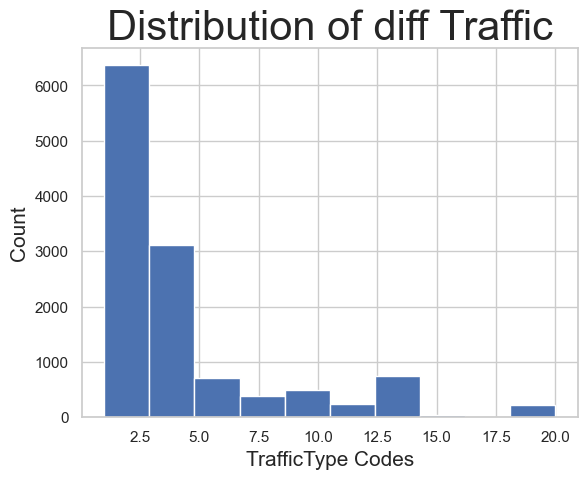

In [18]:
plt.hist(df['TrafficType'])
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0, 0.5, 'Count')

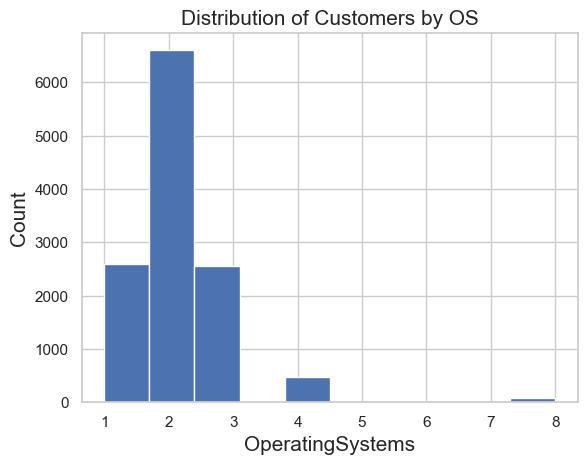

In [24]:
plt.hist(df['OperatingSystems'])
plt.title('Distribution of Customers by OS',fontsize = 15)
plt.xlabel('OperatingSystems', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0, 0.5, 'Count')

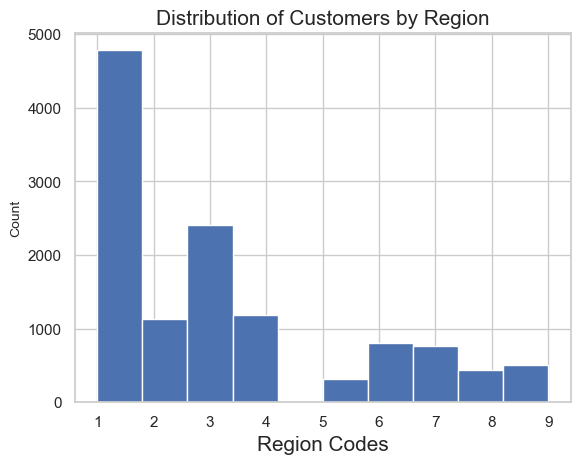

In [22]:
plt.hist(df['Region'])
plt.title('Distribution of Customers by Region',fontsize = 15)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 10)

Text(0, 0.5, 'Count')

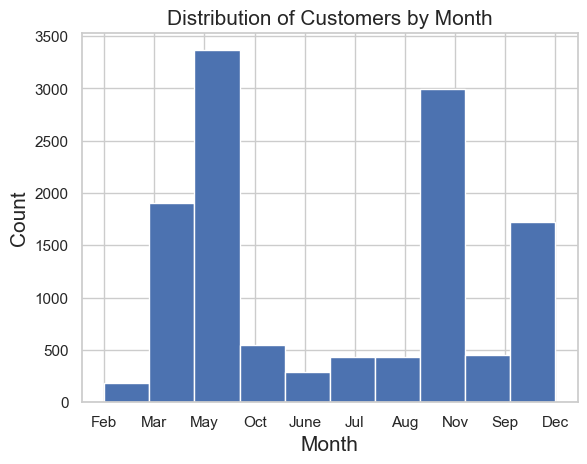

In [27]:
plt.hist(df['Month'])
plt.title('Distribution of Customers by Month',fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Text(0.5, 1.0, 'Page values over revenue')

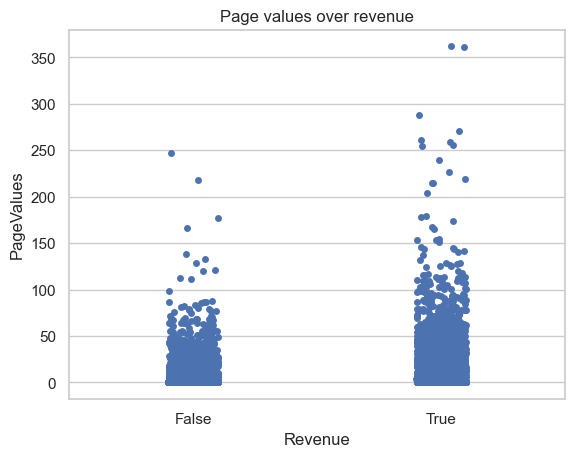

In [35]:
sns.stripplot(x = df['Revenue'], y = df['PageValues'])
plt.title("Page values over revenue")

Text(0.5, 1.0, 'Distribution of Revenue over BounceRates')

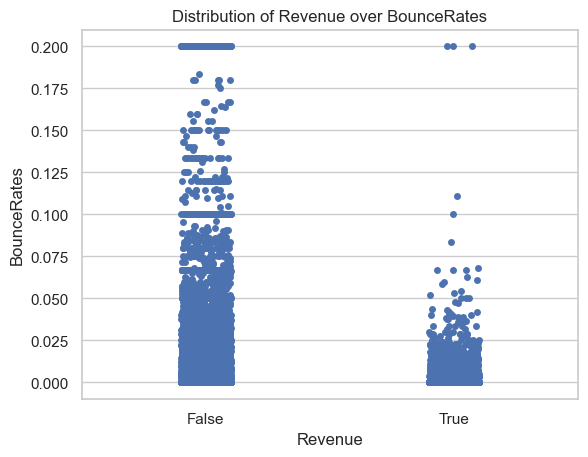

In [37]:
sns.stripplot(x=df['Revenue'], y = df['BounceRates'])
plt.title("Distribution of Revenue over BounceRates")

NameError: name 'with_hue' is not defined

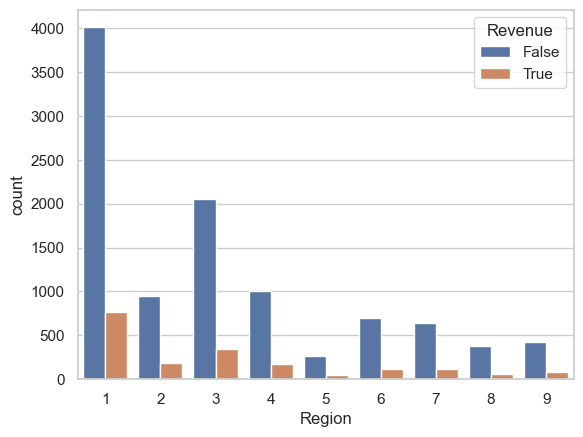

In [41]:
ax4=sns.countplot(x=df['Region'],hue='Revenue', data=df)
with_hue(ax3,df.Region,2,2)

Linear Regression plot between Administrative and Informational

/Users/macintosh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


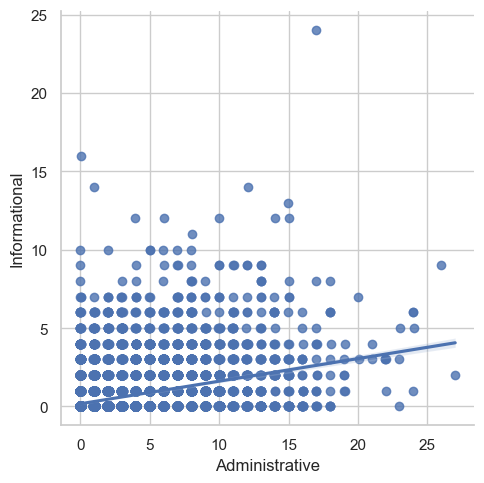

In [40]:
sns.lmplot(x = 'Administrative', y = 'Informational', data = df, x_jitter = 0.05)

### Multi-variate analysis

Text(0.5, 1.0, 'Mon. vs PageValues by Rev.')

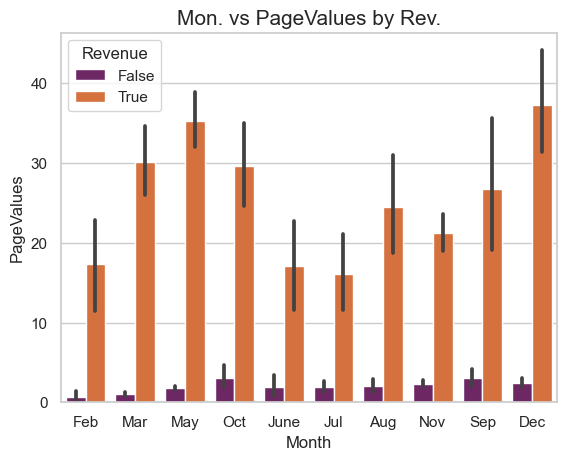

In [49]:
sns.barplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'inferno')
plt.title('Mon. vs PageValues by Rev.', fontsize = 15)

Text(0.5, 1.0, 'Visitors vs BounceRates by Revenue.')

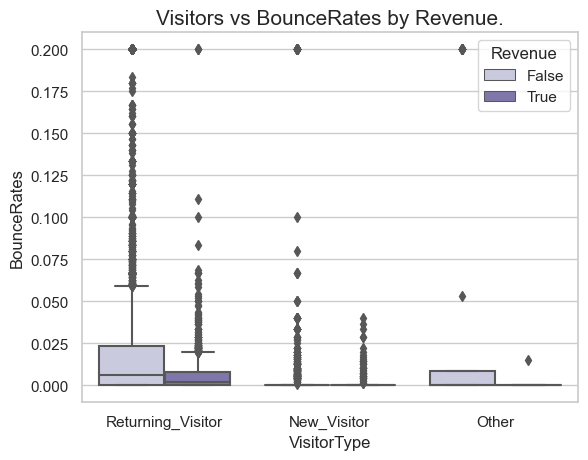

In [50]:
# visitor type vs BounceRates with respect to revenue
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates by Revenue.', fontsize = 15)

Text(0.5, 1.0, 'Visitors vs BounceRates by Revenue.')

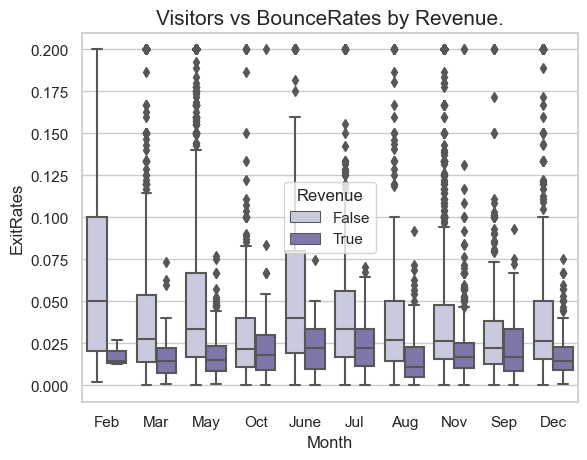

In [52]:
# Month and Exit Rate with respect to revenue
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates by Revenue.', fontsize = 15)